In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

print("Imports loaded ✅")

Imports loaded ✅


In [28]:
file_path = "Mental Health dataset1.csv"  # adjust if needed
df = pd.read_csv(file_path)

print("Shape:", df.shape)
df.head()

Shape: (261328, 17)


,Gender,Country,Occupation,SelfEmployed,FamilyHistory,Treatment,DaysIndoors,HabitsChange,MentalHealthHistory,IncreasingStress,MoodSwings,SocialWeakness,CopingStruggles,WorkInterest,SocialWeakness.1,MentalHealthInterview,CareOptions
0,Female,UK,Others,No,Yes,No,15-30 days,No,Yes,Yes,High,No,Yes,Maybe,No,No,No
1,Female,USA,Housewife,No,Yes,No,15-30 days,Maybe,Maybe,Yes,High,Maybe,Yes,Maybe,Maybe,No,Not sure
2,Female,Canada,Others,No,No,Yes,More than 2 months,Maybe,No,No,Medium,No,No,No,No,No,Not sure
3,Female,Canada,Corporate,No,Yes,Yes,Go out Every day,No,Maybe,No,Medium,No,No,Maybe,No,No,Not sure
4,Female,UK,Corporate,No,No,Yes,More than 2 months,Yes,No,Maybe,Medium,Maybe,No,Maybe,Maybe,No,Not sure


In [6]:
print("Data types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nNumber of unique values per column:")
print(df.nunique())

Data types:
Gender                   object
Country                  object
Occupation               object
SelfEmployed             object
FamilyHistory            object
Treatment                object
DaysIndoors              object
HabitsChange             object
MentalHealthHistory      object
IncreasingStress         object
MoodSwings               object
SocialWeakness           object
CopingStruggles          object
WorkInterest             object
SocialWeakness.1         object
MentalHealthInterview    object
CareOptions              object
dtype: object

Missing values per column:
Gender                      0
Country                     0
Occupation                  0
SelfEmployed             4356
FamilyHistory               0
Treatment                   0
DaysIndoors                 0
HabitsChange                0
MentalHealthHistory         0
IncreasingStress            0
MoodSwings                  0
SocialWeakness              0
CopingStruggles             0
WorkInterest

In [7]:
# Strip spaces and unify capitalization for object columns
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip()

# Preview cleaned values for a couple of key columns
print("Treatment values:", df["Treatment"].unique())
print("Gender values:", df["Gender"].unique())
print("Country (sample):", df["Country"].unique()[:10])

Treatment values: ['No' 'Yes']
Gender values: ['Female' 'Male']
Country (sample): ['UK' 'USA' 'Canada' 'New Zealand' 'Australia' 'Poland' 'South Africa'
 'Ireland' 'Belgium' 'Netherlands']


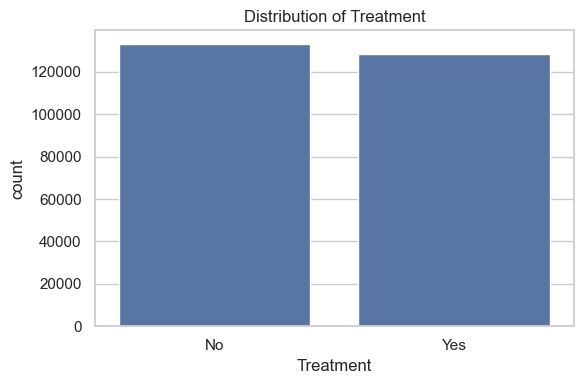

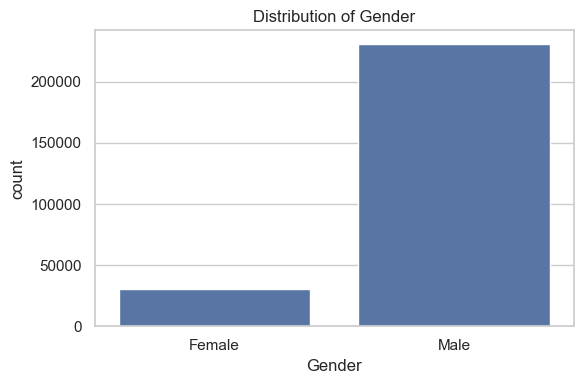

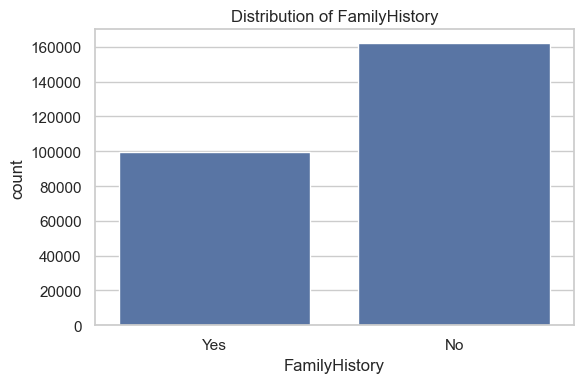

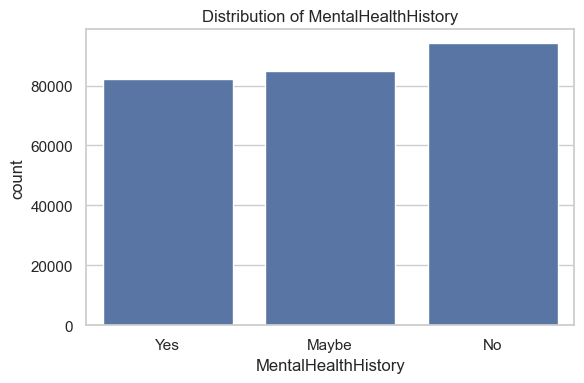

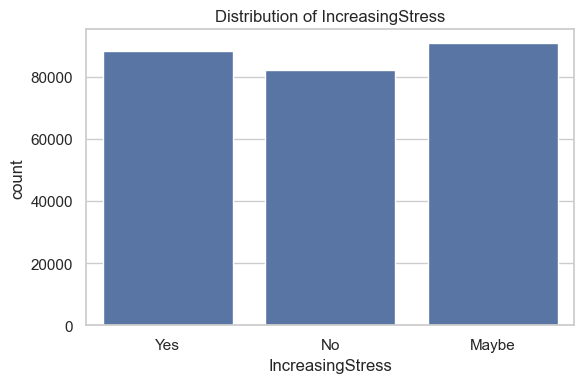

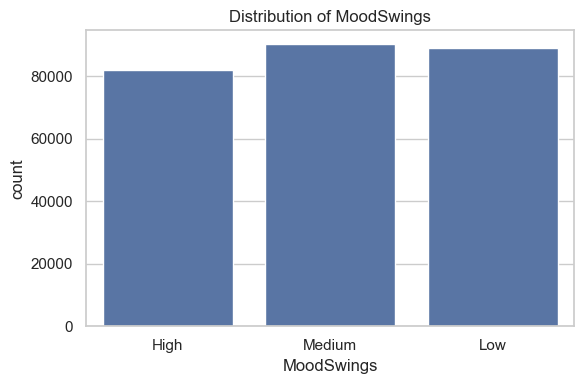

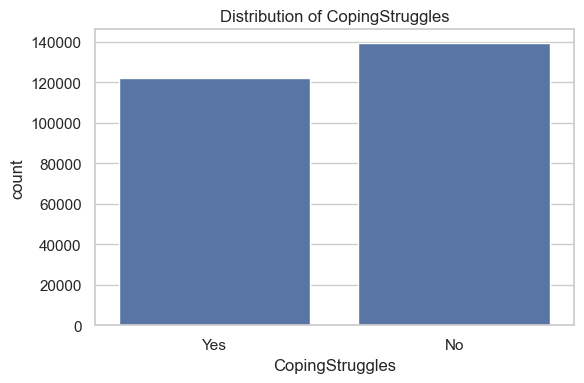

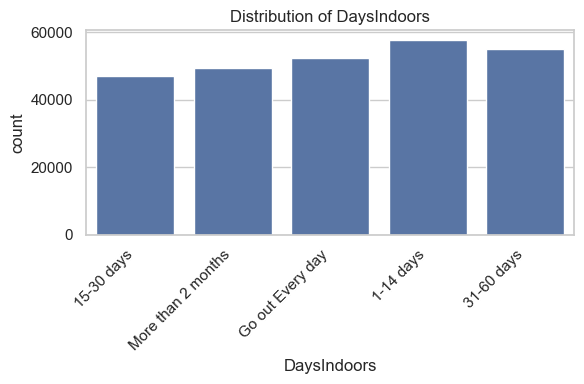

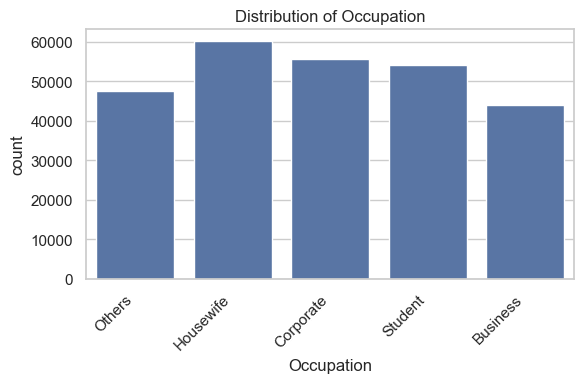

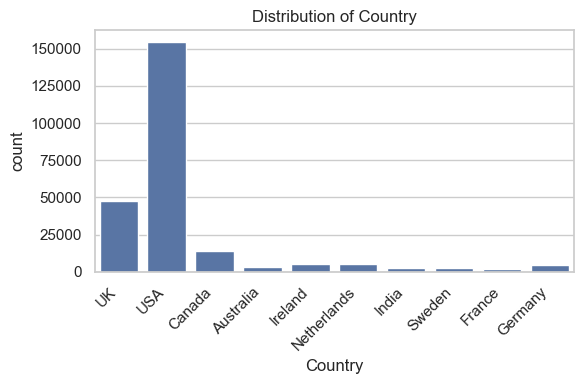

In [8]:
def plot_count(col, top_n=None, rotate=False):
    plt.figure(figsize=(6, 4))

    if top_n:
        data = df[col].value_counts().head(top_n).index
        sns.countplot(data=df[df[col].isin(data)], x=col)
    else:
        sns.countplot(data=df, x=col)

    if rotate:
        plt.xticks(rotation=45, ha="right")
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# Core variables
plot_count("Treatment")
plot_count("Gender")
plot_count("FamilyHistory")
plot_count("MentalHealthHistory")
plot_count("IncreasingStress")
plot_count("MoodSwings")
plot_count("CopingStruggles")
plot_count("DaysIndoors", rotate=True)

# High-cardinality: only show top categories
plot_count("Occupation", top_n=10, rotate=True)
plot_count("Country", top_n=10, rotate=True)

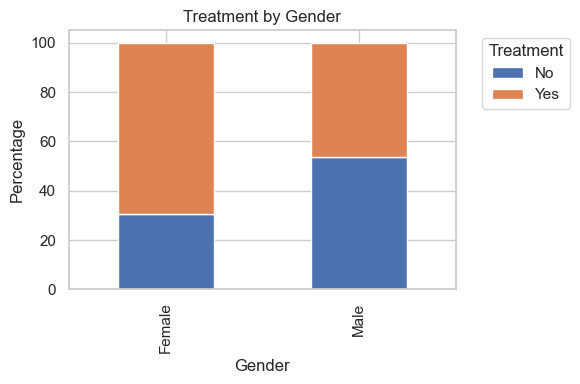

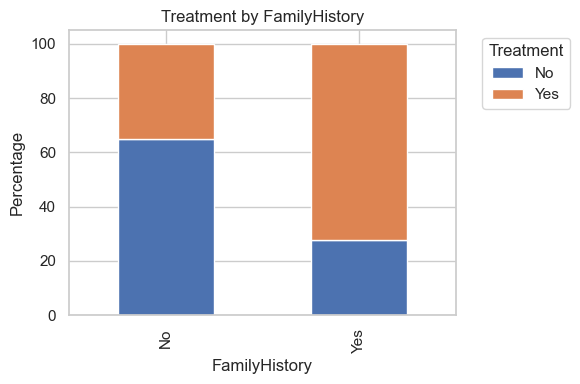

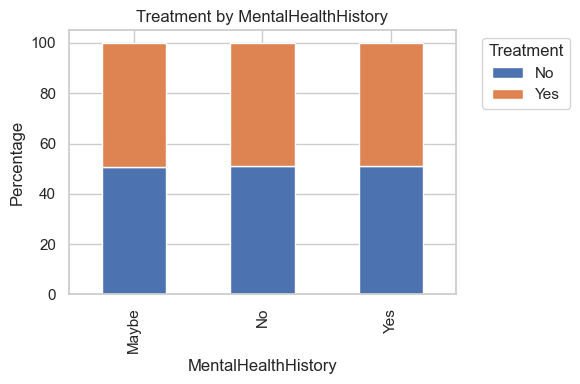

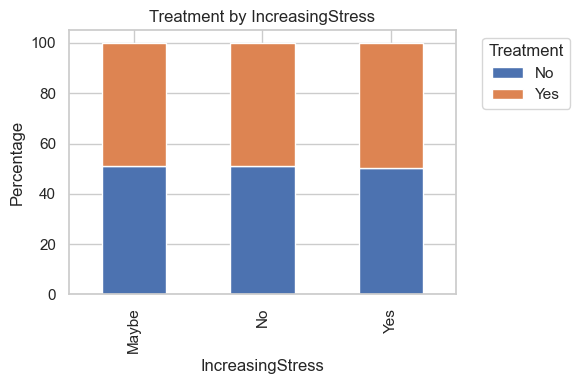

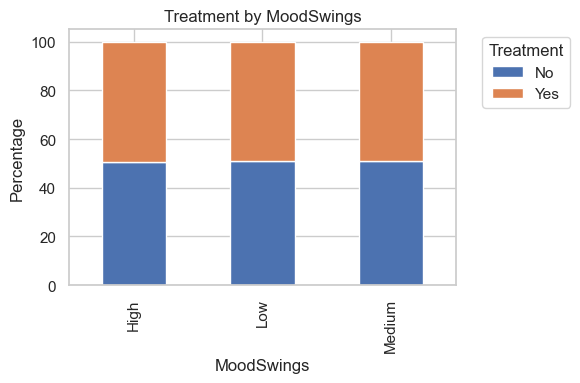

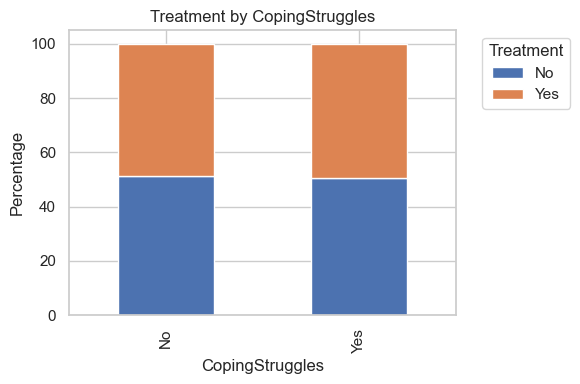

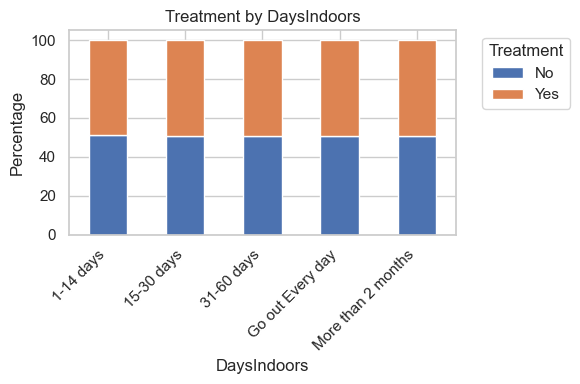

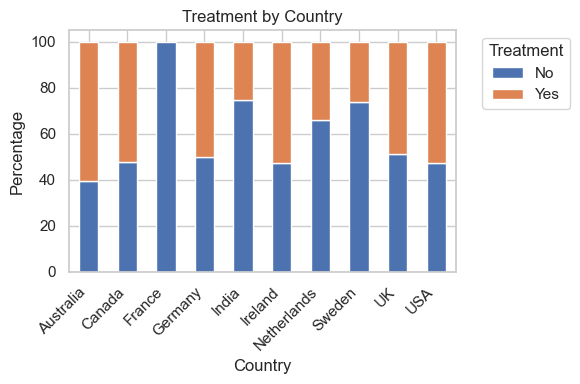

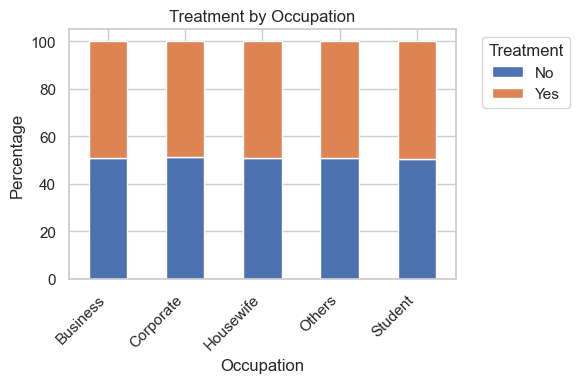

In [9]:
def stacked_bar(col, top_n=None, rotate=False):
    if top_n:
        vals = df[col].value_counts().head(top_n).index
        temp = df[df[col].isin(vals)]
    else:
        temp = df.copy()

    ct = pd.crosstab(temp[col], temp["Treatment"], normalize="index") * 100
    ct.plot(kind="bar", stacked=True, figsize=(6,4))
    plt.ylabel("Percentage")
    plt.title(f"Treatment by {col}")
    if rotate:
        plt.xticks(rotation=45, ha="right")
    plt.legend(title="Treatment", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# Binary / low-cardinality predictors vs Treatment
stacked_bar("Gender")
stacked_bar("FamilyHistory")
stacked_bar("MentalHealthHistory")
stacked_bar("IncreasingStress")
stacked_bar("MoodSwings")
stacked_bar("CopingStruggles")
stacked_bar("DaysIndoors", rotate=True)

# High-cardinality (top N only)
stacked_bar("Country", top_n=10, rotate=True)
stacked_bar("Occupation", top_n=10, rotate=True)

In [10]:
# Family history vs Treatment (counts and row percentages)
print("Family history vs Treatment (counts):")
print(pd.crosstab(df["FamilyHistory"], df["Treatment"]))

print("\nFamily history vs Treatment (row %):")
print(pd.crosstab(df["FamilyHistory"], df["Treatment"], normalize="index").round(3))

# Mental health history vs Treatment
print("\nMental health history vs Treatment (row %):")
print(pd.crosstab(df["MentalHealthHistory"], df["Treatment"], normalize="index").round(3))

# Increasing stress vs Treatment
print("\nIncreasing stress vs Treatment (row %):")
print(pd.crosstab(df["IncreasingStress"], df["Treatment"], normalize="index").round(3))

Family history vs Treatment (counts):
Treatment          No    Yes
FamilyHistory               
No             105367  56614
Yes             27591  71756

Family history vs Treatment (row %):
Treatment         No    Yes
FamilyHistory              
No             0.650  0.350
Yes            0.278  0.722

Mental health history vs Treatment (row %):
Treatment               No    Yes
MentalHealthHistory              
Maybe                0.506  0.494
No                   0.511  0.489
Yes                  0.509  0.491

Increasing stress vs Treatment (row %):
Treatment            No    Yes
IncreasingStress              
Maybe             0.513  0.487
No                0.510  0.490
Yes               0.503  0.497


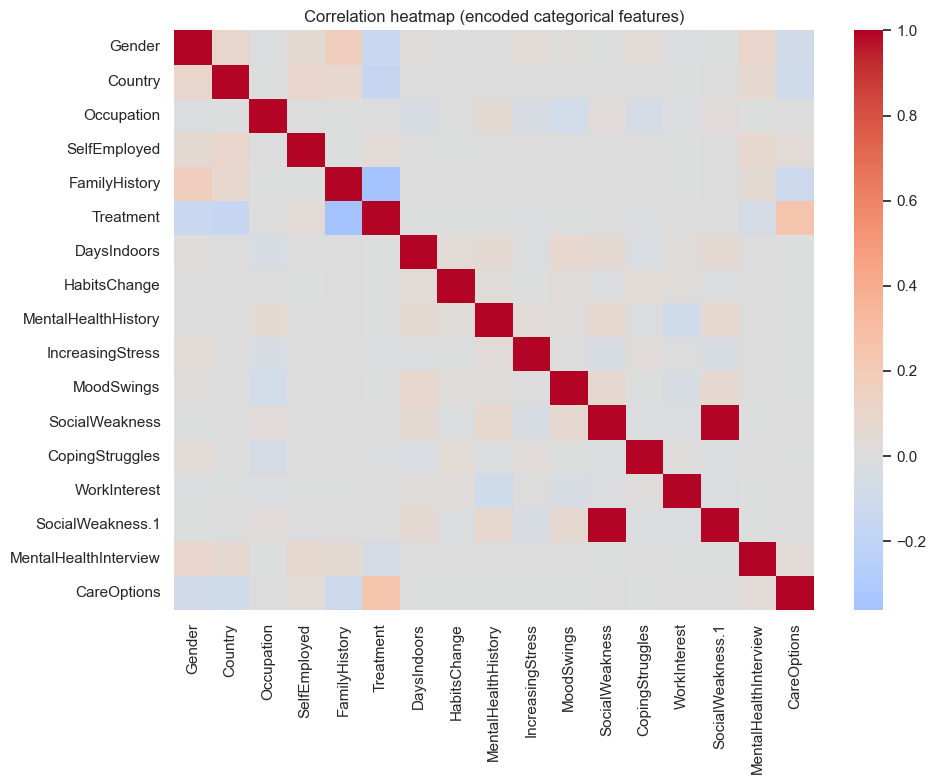

In [11]:
# Encode categorical columns numerically
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col], _ = pd.factorize(df_encoded[col])

corr = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation heatmap (encoded categorical features)")
plt.tight_layout()
plt.show()

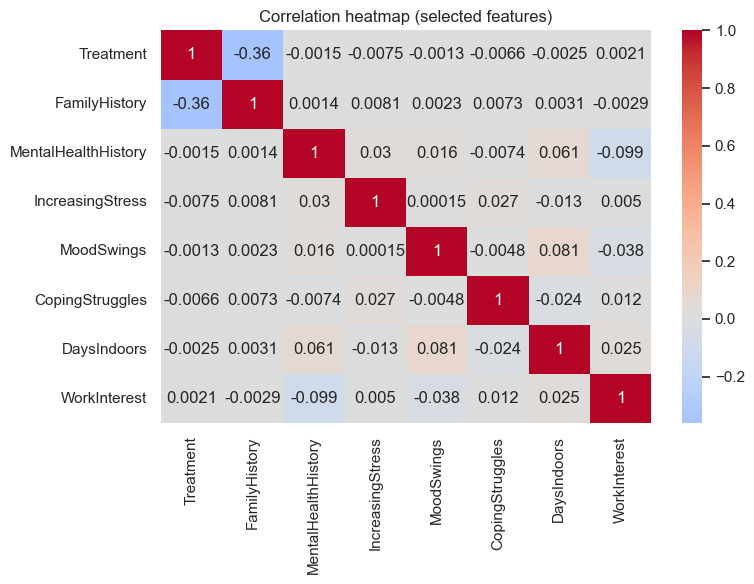

In [12]:
cols_of_interest = [
    "Treatment", "FamilyHistory", "MentalHealthHistory",
    "IncreasingStress", "MoodSwings", "CopingStruggles",
    "DaysIndoors", "WorkInterest"
]

plt.figure(figsize=(8,6))
sns.heatmap(corr.loc[cols_of_interest, cols_of_interest], cmap="coolwarm", center=0, annot=True)
plt.title("Correlation heatmap (selected features)")
plt.tight_layout()
plt.show()

In [13]:
print("Duplicated column names:", df.columns[df.columns.duplicated()].tolist())

print("\nColumns:")
for i, c in enumerate(df.columns):
    print(i, c)

Duplicated column names: []

Columns:
0 Gender
1 Country
2 Occupation
3 SelfEmployed
4 FamilyHistory
5 Treatment
6 DaysIndoors
7 HabitsChange
8 MentalHealthHistory
9 IncreasingStress
10 MoodSwings
11 SocialWeakness
12 CopingStruggles
13 WorkInterest
14 SocialWeakness.1
15 MentalHealthInterview
16 CareOptions


In [14]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

cols = ["Treatment", "FamilyHistory", "MentalHealthHistory", "IncreasingStress",
        "MoodSwings", "CopingStruggles", "DaysIndoors", "WorkInterest"]

for c1 in cols:
    for c2 in cols:
        if c1 != c2:
            print(f"{c1} vs {c2}: {cramers_v(df[c1], df[c2]):.2f}")


Treatment vs FamilyHistory: 0.36
Treatment vs MentalHealthHistory: 0.00
Treatment vs IncreasingStress: 0.01
Treatment vs MoodSwings: 0.00
Treatment vs CopingStruggles: 0.01
Treatment vs DaysIndoors: 0.00
Treatment vs WorkInterest: 0.00
FamilyHistory vs Treatment: 0.36
FamilyHistory vs MentalHealthHistory: 0.01
FamilyHistory vs IncreasingStress: 0.01
FamilyHistory vs MoodSwings: 0.00
FamilyHistory vs CopingStruggles: 0.01
FamilyHistory vs DaysIndoors: 0.00
FamilyHistory vs WorkInterest: 0.00
MentalHealthHistory vs Treatment: 0.00
MentalHealthHistory vs FamilyHistory: 0.01
MentalHealthHistory vs IncreasingStress: 0.03
MentalHealthHistory vs MoodSwings: 0.07
MentalHealthHistory vs CopingStruggles: 0.06
MentalHealthHistory vs DaysIndoors: 0.09
MentalHealthHistory vs WorkInterest: 0.08
IncreasingStress vs Treatment: 0.01
IncreasingStress vs FamilyHistory: 0.01
IncreasingStress vs MentalHealthHistory: 0.03
IncreasingStress vs MoodSwings: 0.04
IncreasingStress vs CopingStruggles: 0.04
Increas

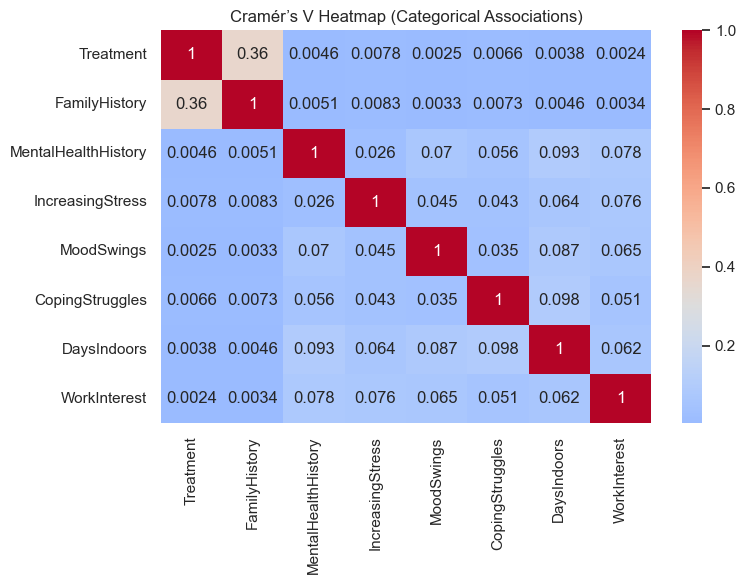

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Build a matrix of Cramér’s V
cramer_matrix = pd.DataFrame(index=cols, columns=cols)

for c1 in cols:
    for c2 in cols:
        if c1 == c2:
            cramer_matrix.loc[c1, c2] = 1.0
        else:
            cramer_matrix.loc[c1, c2] = cramers_v(df[c1], df[c2])

cramer_matrix = cramer_matrix.astype(float)

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(cramer_matrix, annot=True, cmap="coolwarm", center=0.3)
plt.title("Cramér’s V Heatmap (Categorical Associations)")
plt.tight_layout()
plt.show()


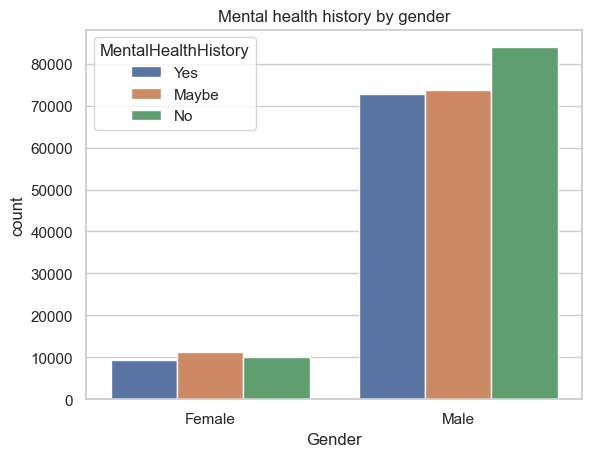

In [16]:
sns.countplot(x="Gender", hue="MentalHealthHistory", data=df)
plt.title("Mental health history by gender")
plt.show()

In [17]:
pd.crosstab(df["DaysIndoors"], df["MentalHealthHistory"], normalize="index")*100

MentalHealthHistory,Maybe,No,Yes
DaysIndoors,,,
1-14 days,28.474947,42.702872,28.822181
15-30 days,30.662361,31.318775,38.018864
31-60 days,38.831103,33.595796,27.573102
Go out Every day,26.978706,38.330026,34.691269
More than 2 months,37.885740,32.737128,29.377132


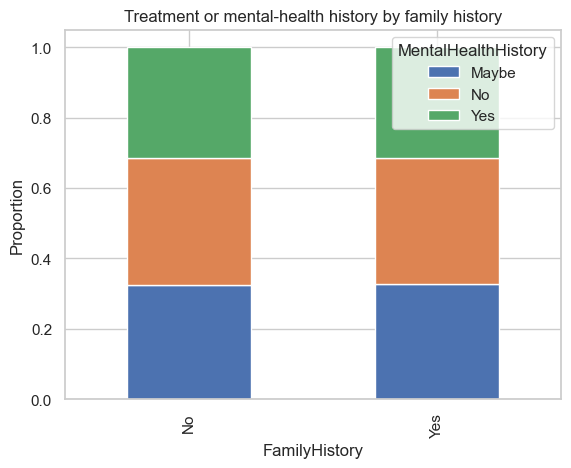

In [18]:
df.groupby("FamilyHistory")["MentalHealthHistory"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)
plt.title("Treatment or mental-health history by family history")
plt.ylabel("Proportion")
plt.show()

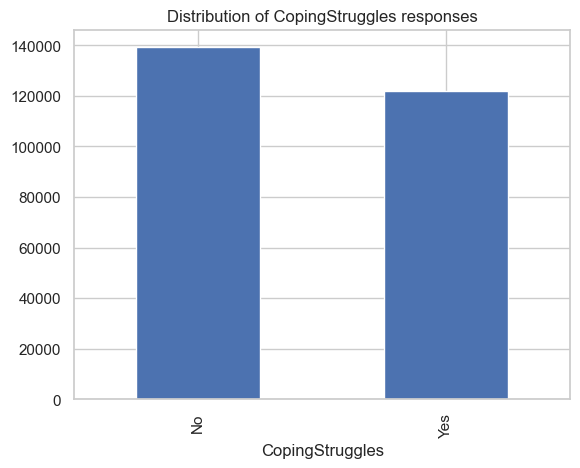

In [19]:
df["CopingStruggles"].value_counts().plot(kind="bar")
plt.title("Distribution of CopingStruggles responses")
plt.show()

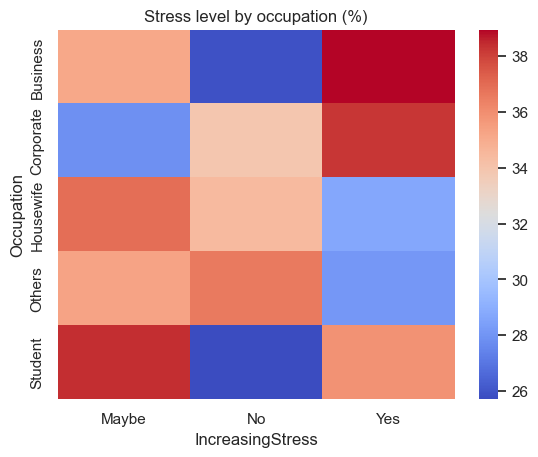

In [20]:
pivot = pd.crosstab(df["Occupation"], df["IncreasingStress"], normalize="index")*100
sns.heatmap(pivot, cmap="coolwarm")
plt.title("Stress level by occupation (%)")
plt.show()

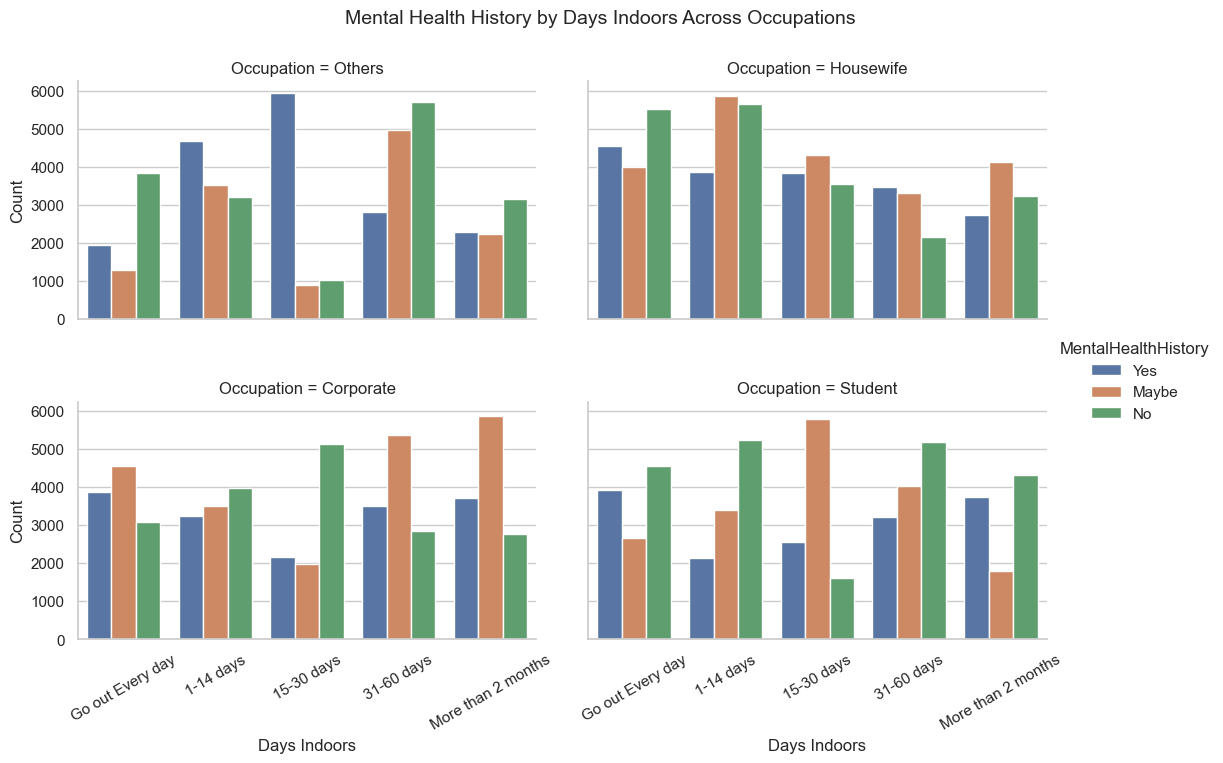

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Desired order for DaysIndoors
days_order = [
    "Go out Every day",
    "1-14 days",
    "15-30 days",
    "31-60 days",
    "More than 2 months"
]

# Make DaysIndoors an ordered categorical so plots follow this order
df["DaysIndoors"] = pd.Categorical(df["DaysIndoors"], categories=days_order, ordered=True)

# Top 4 occupations for readability
top_occupations = df["Occupation"].value_counts().head(4).index
subset = df[df["Occupation"].isin(top_occupations)].copy()

g = sns.catplot(
    data=subset,
    x="DaysIndoors",
    hue="MentalHealthHistory",
    col="Occupation",
    kind="count",
    order=days_order,          # enforce order on x-axis
    col_wrap=2,
    height=4.5,
    aspect=1.2
)

# Rotate labels and set axis titles
for ax in g.axes.flatten():
    ax.tick_params(axis="x", labelrotation=30)
    ax.set_xlabel("Days Indoors")
    ax.set_ylabel("Count")

g.fig.subplots_adjust(bottom=0.28, top=0.9, hspace=0.35)
g.fig.suptitle("Mental Health History by Days Indoors Across Occupations", fontsize=14)

plt.show()

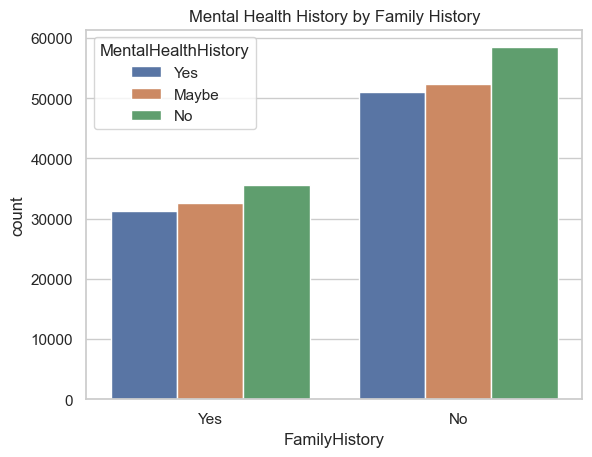

In [22]:
sns.countplot(x="FamilyHistory", hue="MentalHealthHistory", data=df)
plt.title("Mental Health History by Family History")
plt.show()

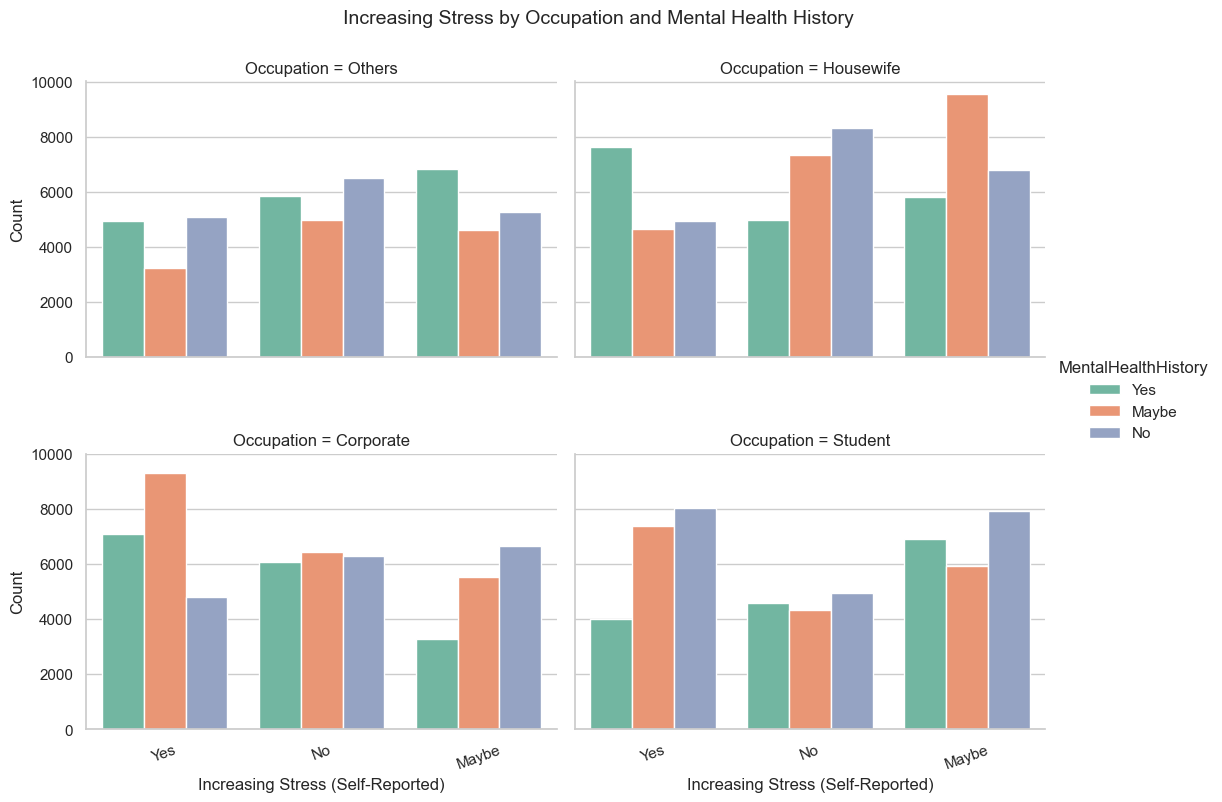

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose top occupations for readability
top_occupations = df["Occupation"].value_counts().head(4).index
subset = df[df["Occupation"].isin(top_occupations)].copy()

# Create FacetGrid: IncreasingStress × MentalHealthHistory by Occupation
g = sns.catplot(
    data=subset,
    x="IncreasingStress",
    hue="MentalHealthHistory",
    col="Occupation",
    kind="count",
    col_wrap=2,
    height=4.5,
    aspect=1.2,
    palette="Set2"
)

# Rotate x-axis labels and set axis titles
for ax in g.axes.flatten():
    ax.tick_params(axis="x", labelrotation=20)
    ax.set_xlabel("Increasing Stress (Self-Reported)")
    ax.set_ylabel("Count")

# Adjust spacing and add a main title
g.fig.subplots_adjust(bottom=0.18, top=0.9, hspace=0.35)
g.fig.suptitle("Increasing Stress by Occupation and Mental Health History", fontsize=14)

plt.show()

In [39]:
# Step 1: Define the columns that represent mental-health indicators
indicators = [
    "MentalHealthHistory",
    "Treatment",
    "MentalHealthInterview",
    "CopingStruggles",
    "IncreasingStress",
    "MoodSwings",
    "SocialWeakness"
]

# Step 2: Standardize text (makes "Yes"/"yes"/"YES" all the same)
df[indicators] = df[indicators].apply(lambda x: x.astype(str).str.strip().str.lower())

# Step 3: Count how many indicators each person said "yes" to
df["yes_count"] = df[indicators].apply(lambda row: sum(val == "yes" for val in row), axis=1)

# Step 4: Create a new binary variable for severity
# You can adjust the threshold if needed — here, 3 or more "yes" responses = strong concern
df["MentalHealthOutcome"] = df["yes_count"].apply(lambda x: 1 if x >= 3 else 0)

# Step 5: Check balance of the new variable
print(df["MentalHealthOutcome"].value_counts())
print(df["MentalHealthOutcome"].value_counts(normalize=True) * 100)

MentalHealthOutcome
0    183329
1     77999
Name: count, dtype: int64
MentalHealthOutcome
0    70.152835
1    29.847165
Name: proportion, dtype: float64


In [35]:
df[(df["Treatment"] == "No") & (df["MentalHealthInterview"] == "No") & (df["MentalHealthHistory"] == "No")]

,Gender,Country,Occupation,SelfEmployed,FamilyHistory,Treatment,DaysIndoors,HabitsChange,MentalHealthHistory,IncreasingStress,MoodSwings,SocialWeakness,CopingStruggles,WorkInterest,SocialWeakness.1,MentalHealthInterview,CareOptions,yes_count,MentalHealthOutcome
18,Female,Usa,Housewife,No,No,No,Go Out Every Day,Maybe,No,No,Medium,Maybe,No,Maybe,Maybe,No,No,0,0
28,Female,Usa,Business,No,No,No,1-14 Days,No,No,Yes,High,Yes,No,Yes,Yes,No,Not Sure,2,0
40,Female,Usa,Housewife,No,No,No,1-14 Days,Yes,No,Yes,High,No,Yes,No,No,No,Yes,2,0
47,Female,Usa,Business,No,No,No,More Than 2 Months,Yes,No,Maybe,Medium,Yes,No,No,Yes,No,Not Sure,1,0
65,Female,Australia,Business,No,Yes,No,31-60 Days,No,No,Yes,Low,No,No,Maybe,No,No,No,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261304,Male,Usa,Business,No,No,No,15-30 Days,Maybe,No,No,Low,Maybe,Yes,No,Maybe,No,Not Sure,1,0
261308,Male,Usa,Business,No,Yes,No,15-30 Days,Maybe,No,No,Low,Maybe,Yes,No,Maybe,No,No,1,0
261311,Male,Usa,Business,No,No,No,15-30 Days,Maybe,No,No,Low,Maybe,Yes,No,Maybe,No,No,1,0
261312,Male,Usa,Business,No,No,No,15-30 Days,Maybe,No,No,Low,Maybe,Yes,No,Maybe,No,No,1,0


In [38]:
no_indicators = df[
    (df["MentalHealthHistory"] == "No") &
    (df["Treatment"] == "No") &
    (df["MentalHealthInterview"] == "No") &
    (df["CopingStruggles"] == "No") &
    (df["IncreasingStress"] == "No") &
    (df["MoodSwings"] == "No") &
    (df["SocialWeakness"] == "No")
]

print(f"Number of respondents who said 'No' to all indicators: {len(no_indicators)}")
no_indicators.head()

Number of respondents who said 'No' to all indicators: 0


,Gender,Country,Occupation,SelfEmployed,FamilyHistory,Treatment,DaysIndoors,HabitsChange,MentalHealthHistory,IncreasingStress,MoodSwings,SocialWeakness,CopingStruggles,WorkInterest,SocialWeakness.1,MentalHealthInterview,CareOptions,yes_count,MentalHealthOutcome


In [33]:
df.iloc[18]

Gender                             Female
Country                               USA
Occupation                      Housewife
SelfEmployed                           No
FamilyHistory                          No
Treatment                              no
DaysIndoors              Go out Every day
HabitsChange                        Maybe
MentalHealthHistory                    no
IncreasingStress                       no
MoodSwings                         medium
SocialWeakness                      maybe
CopingStruggles                        no
WorkInterest                        Maybe
SocialWeakness.1                    Maybe
MentalHealthInterview                  no
CareOptions                            No
yes_count                               0
MentalHealthOutcome                     0
Name: 18, dtype: object

In [37]:
df = df.apply(lambda x: x.astype(str).str.strip().str.title())

In [40]:
# Step 1: Define the columns that represent mental-health indicators
indicators = [
    "MentalHealthHistory",
    "Treatment",
    "MentalHealthInterview"
]

# Step 2: Standardize text (makes "Yes"/"yes"/"YES" all the same)
df[indicators] = df[indicators].apply(lambda x: x.astype(str).str.strip().str.lower())

# Step 3: Count how many indicators each person said "yes" to
df["yes_count"] = df[indicators].apply(lambda row: sum(val == "yes" for val in row), axis=1)

# Step 4: Create a new binary variable for severity
# You can adjust the threshold if needed — here, 3 or more "yes" responses = strong concern
df["MentalHealthOutcome"] = df["yes_count"].apply(lambda x: 1 if x >= 3 else 0)

# Step 5: Check balance of the new variable
print(df["MentalHealthOutcome"].value_counts())
print(df["MentalHealthOutcome"].value_counts(normalize=True) * 100)

MentalHealthOutcome
0    259912
1      1416
Name: count, dtype: int64
MentalHealthOutcome
0    99.458152
1     0.541848
Name: proportion, dtype: float64
